In [153]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import linregress

# 1.1 Základný opis dát spolu s ich charakteristikami, EDA
## A - Analýza štruktúr dát ako súbory

In [155]:
# load the datasets
df_profiles     = pd.read_csv("data/profiles.csv", sep='\t')
df_processes    = pd.read_csv("data/processes.csv", sep='\t')
df_devices      = pd.read_csv("data/devices.csv", sep='\t')
df_connections  = pd.read_csv("data/connections.csv", sep='\t')

# better info()
def analyze_dataframe(df):
    table = pd.DataFrame({
        'Missing Values': df.isnull().sum(),
        'Data Type': df.dtypes
    })

    rows, columns = df.shape
    duplicates = df.duplicated().sum()

    print(f"Shape: {rows} rows, {columns} columns")
    print(f"Duplicates: {duplicates}")

    display(table)

FileNotFoundError: [Errno 2] No such file or directory: 'data/profiles.csv'

## PROFILES:

In [ ]:
# displaying them
analyze_dataframe(df_profiles)
df_profiles.describe()

In [156]:
df_profiles.head()

,mail,imei,birthdate,username,user_id,address,ssn,job,registration,current_location,company,name
0,melissajohnson@gmail.com,3590433799317661495,1927-05-24,onealjason,262,NaN,283-10-3548,NaN,"01/06/2021, 00:00:00","(Decimal('-66.534360'), Decimal('-20.750866'))",Hernandez-Gomez,Sara Allen
1,isabellahenderson@gmail.com,359043379931766338,1952-05-17,achang,351,"11074 Nelson Mills\nPort Douglaston, GA 41980",220-76-7219,NaN,11 Oct 2022,"(Decimal('64.457831'), Decimal('61.662934'))",Wood-Turner,Allen Day
2,abigail33@yahoo.com,359043379931766940,1929-07-04,burgessedward,2558,"0755 Scott Parks Apt. 877\nBowersborough, PW 09601",559-66-9181,Academic librarian,"05/17/2024, 00:00:00","(Decimal('-19.5608945'), Decimal('-175.139772'))","Underwood, Hughes and Alexander",Michelle Martin
3,haleyjanice@hotmail.com,3590433799317661990,1974-09-21,marshlisa,2619,NaN,198-29-6956,NaN,08 Jun 2019,"(Decimal('80.5917705'), Decimal('-34.292908'))",Ramos-Carroll,Samantha Lewis
4,brandy34@gmail.com,8630330696303482196,1926-02-20,gregorystephanie,1630,"99026 Dana Court Apt. 233\nEast Nathanhaven, WV 09935",611-79-1165,NaN,2022/05/28,"(Decimal('-24.8391805'), Decimal('42.738041'))",Williams-Torres,Alan Smith


## ----------------------------------------------------------------------------------------

## PROCESSES:

In [157]:
analyze_dataframe(df_processes)
df_processes.describe()

Shape: 14877 rows, 23 columns
Duplicates: 0


,Missing Values,Data Type
ts,0,object
imei,0,int64
mwra,0,float64
p.android.externalstorage,0,float64
p.system,0,float64
p.android.packageinstaller,0,float64
p.android.settings,0,float64
p.android.chrome,0,float64
p.android.gm,0,float64
p.android.documentsui,0,float64


,imei,mwra,p.android.externalstorage,p.system,p.android.packageinstaller,p.android.settings,p.android.chrome,p.android.gm,p.android.documentsui,p.process.gapps,...,p.olauncher,p.dogalize,p.android.gms,p.simulator,p.katana,p.inputmethod.latin,p.browser.provider,p.android.defcontainer,p.android.vending,p.google
count,1.487700e+04,14877.00000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,...,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000
mean,3.863557e+18,0.62600,11.725774,11.152045,10.539202,9.900600,9.901451,9.980249,9.389030,0.181631,...,51.032415,49.452457,50.033304,49.659018,49.644100,50.225818,49.864006,49.835091,49.561514,49.769340
std,3.324784e+18,0.48388,2.380257,2.313573,2.551155,2.468733,2.575151,2.751125,2.363173,2.057483,...,13.770410,28.939986,28.837795,28.975340,28.913628,28.830269,29.028802,28.943981,29.060253,28.855162
min,3.590434e+17,0.00000,3.463510,3.050450,1.914620,2.010490,0.879270,0.000000,1.613180,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.00000,10.119220,9.430070,8.608650,8.081700,8.040310,8.056200,7.784530,0.001080,...,41.743210,24.467810,25.010270,24.671320,24.365960,25.180570,24.600210,24.537040,24.161960,24.683150
50%,3.590434e+18,1.00000,11.835080,11.330840,10.536250,9.820560,9.921090,9.873050,9.211950,0.006810,...,51.130360,49.240130,50.399190,49.252640,49.549780,50.012720,49.865040,49.534060,49.977280,49.457960
75%,8.630331e+18,1.00000,13.378380,12.883710,12.432490,11.787350,11.826740,11.894730,10.727000,0.043590,...,60.395580,74.657640,75.020570,74.856340,74.746610,75.228960,75.374820,74.985100,74.781880,74.837350
max,8.630331e+18,1.00000,20.060160,19.385580,20.321980,18.162090,17.996590,20.563610,20.220660,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [158]:
df_processes.head()

,ts,imei,mwra,p.android.externalstorage,p.system,p.android.packageinstaller,p.android.settings,p.android.chrome,p.android.gm,p.android.documentsui,...,p.olauncher,p.dogalize,p.android.gms,p.simulator,p.katana,p.inputmethod.latin,p.browser.provider,p.android.defcontainer,p.android.vending,p.google
0,2018-05-05 10:00:00,863033069630348727,0.0,12.71345,13.93596,7.37375,8.63678,7.59294,14.50294,12.49939,...,42.36961,24.39972,38.28394,39.75150,70.08727,35.39702,46.96978,94.36793,19.26230,8.71761
1,2018-05-05 10:01:00,359043379931766122,1.0,14.00354,13.66329,8.76390,8.45907,11.54816,9.23023,10.96660,...,43.50996,96.63160,35.35377,8.57826,21.30530,74.91400,28.78964,98.36045,2.67159,96.75896
2,2018-05-05 10:02:00,359043379931766312,0.0,9.12135,12.02995,15.24475,5.03619,9.25225,11.32397,8.95241,...,62.37735,72.10850,55.73124,85.87342,32.33386,55.19794,89.99140,80.51936,37.73145,89.03029
3,2018-05-05 10:03:00,8630330696303482329,0.0,10.02552,10.88392,15.14466,4.58649,7.65930,12.54341,6.13562,...,46.12254,40.36473,21.76176,0.98452,50.83786,90.78544,49.59389,51.32614,90.17701,39.10998
4,2018-05-05 10:04:00,3590433799317661099,1.0,10.18964,10.99286,8.52306,10.09407,13.85506,9.55446,7.87986,...,70.66280,51.37859,74.10500,42.63423,19.35378,47.21558,95.60708,96.18907,21.60796,33.91152


## ----------------------------------------------------------------------------------------

## DEVICES:

In [159]:
analyze_dataframe(df_devices)
df_devices.describe()

Shape: 2868 rows, 6 columns
Duplicates: 0


,Missing Values,Data Type
latitude,0,float64
longitude,0,float64
store_name,0,object
code,1,object
location,0,object
imei,0,int64


,latitude,longitude,imei
count,2868.000000,2868.000000,2.868000e+03
mean,28.992316,9.351526,3.837021e+18
std,23.229739,72.341922,3.302602e+18
min,-54.800000,-156.474320,3.590434e+17
25%,14.640560,-59.133160,8.630331e+17
50%,36.274620,9.152140,3.590434e+18
75%,46.135100,69.013540,8.630331e+18
max,68.798330,171.253640,8.630331e+18


In [160]:
df_devices.head()

,latitude,longitude,store_name,code,location,imei
0,30.35028,112.19028,Jingzhou,CN,Asia/Shanghai,359043379931766676
1,40.65995,-111.99633,Kearns,US,America/Denver,359043379931766486
2,16.05670,103.65309,Roi Et,TH,Asia/Bangkok,359043379931766536
3,-17.73648,168.31366,Port-Vila,VU,Pacific/Efate,359043379931766833
4,4.96667,10.70000,Tonga,CM,Africa/Douala,8630330696303481743


## ----------------------------------------------------------------------------------------

## CONNECTIONS:

In [161]:
analyze_dataframe(df_connections)
df_connections.describe()

Shape: 14877 rows, 13 columns
Duplicates: 0


,Missing Values,Data Type
ts,0,object
imei,0,int64
mwra,0,float64
c.android.chrome,0,float64
c.android.youtube,0,float64
c.dogalize,0,float64
c.android.gm,0,float64
c.katana,0,float64
c.UCMobile.intl,0,float64
c.UCMobile.x86,0,float64


,imei,mwra,c.android.chrome,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.UCMobile.intl,c.UCMobile.x86,c.raider,c.updateassist,c.android.vending
count,1.487700e+04,14877.00000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000
mean,3.863557e+18,0.62600,11.029799,12.337826,11.168276,10.554911,10.007788,44.250573,48.332511,50.017092,50.276062,49.750654
std,3.324784e+18,0.48388,2.714585,1.987878,2.659182,2.709941,2.573152,11.703796,12.933610,28.951927,28.812443,28.692413
min,3.590434e+17,0.00000,1.264880,4.809800,1.448360,1.730240,1.384790,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.00000,9.132130,10.982840,9.299940,8.556610,8.137400,36.323520,39.666220,24.904360,25.559980,25.354500
50%,3.590434e+18,1.00000,11.094830,12.339870,11.267770,10.438980,9.847920,44.338660,48.333300,50.326980,50.513170,49.818970
75%,8.630331e+18,1.00000,12.968940,13.678130,13.056600,12.509070,11.821740,52.231390,57.016780,74.912820,75.254030,74.101450
max,8.630331e+18,1.00000,20.710650,21.205430,21.522060,21.665490,20.036020,100.000000,100.000000,100.000000,100.000000,100.000000


In [162]:
df_connections.head()

,ts,imei,mwra,c.android.chrome,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.UCMobile.intl,c.UCMobile.x86,c.raider,c.updateassist,c.android.vending
0,2018-05-05 10:00:00,863033069630348727,0.0,9.60395,12.85710,14.28416,8.18164,12.05903,51.17664,65.36801,90.61716,26.55309,94.42555
1,2018-05-05 10:01:00,359043379931766122,1.0,10.90381,13.52655,15.47703,12.35803,9.31984,52.40056,57.22735,52.52705,57.31544,75.44486
2,2018-05-05 10:02:00,359043379931766312,0.0,7.96027,13.93330,11.48817,10.58834,16.41358,24.55276,80.27819,91.63614,49.51560,93.00705
3,2018-05-05 10:03:00,8630330696303482329,0.0,7.96574,14.28029,11.68449,13.39682,14.09485,44.81360,34.26693,56.53248,4.51390,27.06048
4,2018-05-05 10:04:00,3590433799317661099,1.0,12.77276,10.43295,10.16739,12.20800,6.18137,34.43871,59.20602,79.33347,27.09736,81.58699


## ----------------------------------------------------------------------------------------

### Zhrnutie analýzy dát
- #### Identifikovali sme duplicitne údajoe a chýbajúce hodnoty. Plánujeme ich odstrániť v nasledujúcej fáze
- #### Budeme sa sústrediť na systémové a používateľské aplikácie, pretože obsahujú relevantné údaje pre detekciu malware
- #### Zlučíme procesy, pripojenia a aplikácie do jedného datasetu na jednoduchšiu analýzu (je to HARD af, ani som to neskusal zatial xd, ale mozno to pomoze pre akoby lepsie usporiadanie a lepsie vysledky)
- #### Rozdelenie dát: Rozdelíme dáta na systémové a používateľské aplikácie (mozno v buducnosti idk fr)
- #### To cisielko moze reprezentovat CPU usage alebo cas, pocas kt. bola ap. pouzivana (fr neviem xd)

## ----------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------

## B - Analýza jednotlivých atribútov, významné atribúty, ich distribúcie a základné deskriptívne štatistiky

#### predovšetkým sa budeme zaujimat o analýzu df_processes a df_connections, ktore suviasia so spravanim mwra asi najviac, vyjadrime si zavislosti cez korelacnu maticu

### DF_PROCESSES

In [163]:
df_numerical_processes = df_processes.select_dtypes(include=['float64', 'int64'])

correlation_matrix_processes = df_numerical_processes.corr()
correlation_matrix_processes

,imei,mwra,p.android.externalstorage,p.system,p.android.packageinstaller,p.android.settings,p.android.chrome,p.android.gm,p.android.documentsui,p.process.gapps,...,p.olauncher,p.dogalize,p.android.gms,p.simulator,p.katana,p.inputmethod.latin,p.browser.provider,p.android.defcontainer,p.android.vending,p.google
imei,1.000000,-0.001523,0.009588,-0.005154,0.005040,0.007600,-0.001648,-0.005993,-0.005560,0.013112,...,-0.005738,-0.007026,-0.003842,-0.005436,0.011612,-0.008396,-0.003202,-0.009467,0.005640,-0.006039
mwra,-0.001523,1.000000,0.296157,-0.300471,0.006763,0.290584,0.279460,-0.525105,-0.308012,0.053786,...,-0.005514,0.016505,0.008442,0.005584,-0.006700,-0.007692,0.009195,-0.004818,-0.000100,0.000791
p.android.externalstorage,0.009588,0.296157,1.000000,-0.195124,-0.244036,-0.065420,0.224111,-0.222442,0.047779,-0.010355,...,-0.006372,0.015548,0.016190,0.006473,0.005777,0.008824,0.000329,-0.012392,0.000436,-0.000571
p.system,-0.005154,-0.300471,-0.195124,1.000000,-0.385400,-0.413111,0.093559,0.323106,0.164769,0.003725,...,0.009360,-0.007656,0.011684,-0.023350,0.002997,0.001704,-0.014727,0.001575,-0.003249,-0.003800
p.android.packageinstaller,0.005040,0.006763,-0.244036,-0.385400,1.000000,0.338897,-0.339690,0.097614,-0.197927,-0.016104,...,-0.001462,-0.007945,-0.005059,-0.003417,0.011803,0.002478,0.003486,-0.009780,-0.009377,0.008267
p.android.settings,0.007600,0.290584,-0.065420,-0.413111,0.338897,1.000000,-0.309468,-0.274216,-0.138505,0.074981,...,-0.005970,-0.001773,0.000350,0.010505,0.001908,-0.000444,0.010054,0.000766,-0.010801,-0.003887
p.android.chrome,-0.001648,0.279460,0.224111,0.093559,-0.339690,-0.309468,1.000000,-0.163102,-0.173978,0.106051,...,-0.001534,0.018986,0.011210,0.000195,-0.005998,0.006214,0.001897,0.011334,0.001910,-0.001512
p.android.gm,-0.005993,-0.525105,-0.222442,0.323106,0.097614,-0.274216,-0.163102,1.000000,0.270123,-0.036085,...,-0.000908,-0.005622,0.006475,-0.010699,0.016391,0.007384,-0.006740,-0.009713,-0.003496,-0.005060
p.android.documentsui,-0.005560,-0.308012,0.047779,0.164769,-0.197927,-0.138505,-0.173978,0.270123,1.000000,-0.106228,...,0.012672,-0.003746,-0.011614,0.009880,0.008028,0.002699,-0.008224,-0.011553,0.002435,-0.000406
p.process.gapps,0.013112,0.053786,-0.010355,0.003725,-0.016104,0.074981,0.106051,-0.036085,-0.106228,1.000000,...,-0.012565,0.017490,0.006649,0.000727,0.002234,0.012531,-0.000073,-0.004249,-0.015505,-0.000408


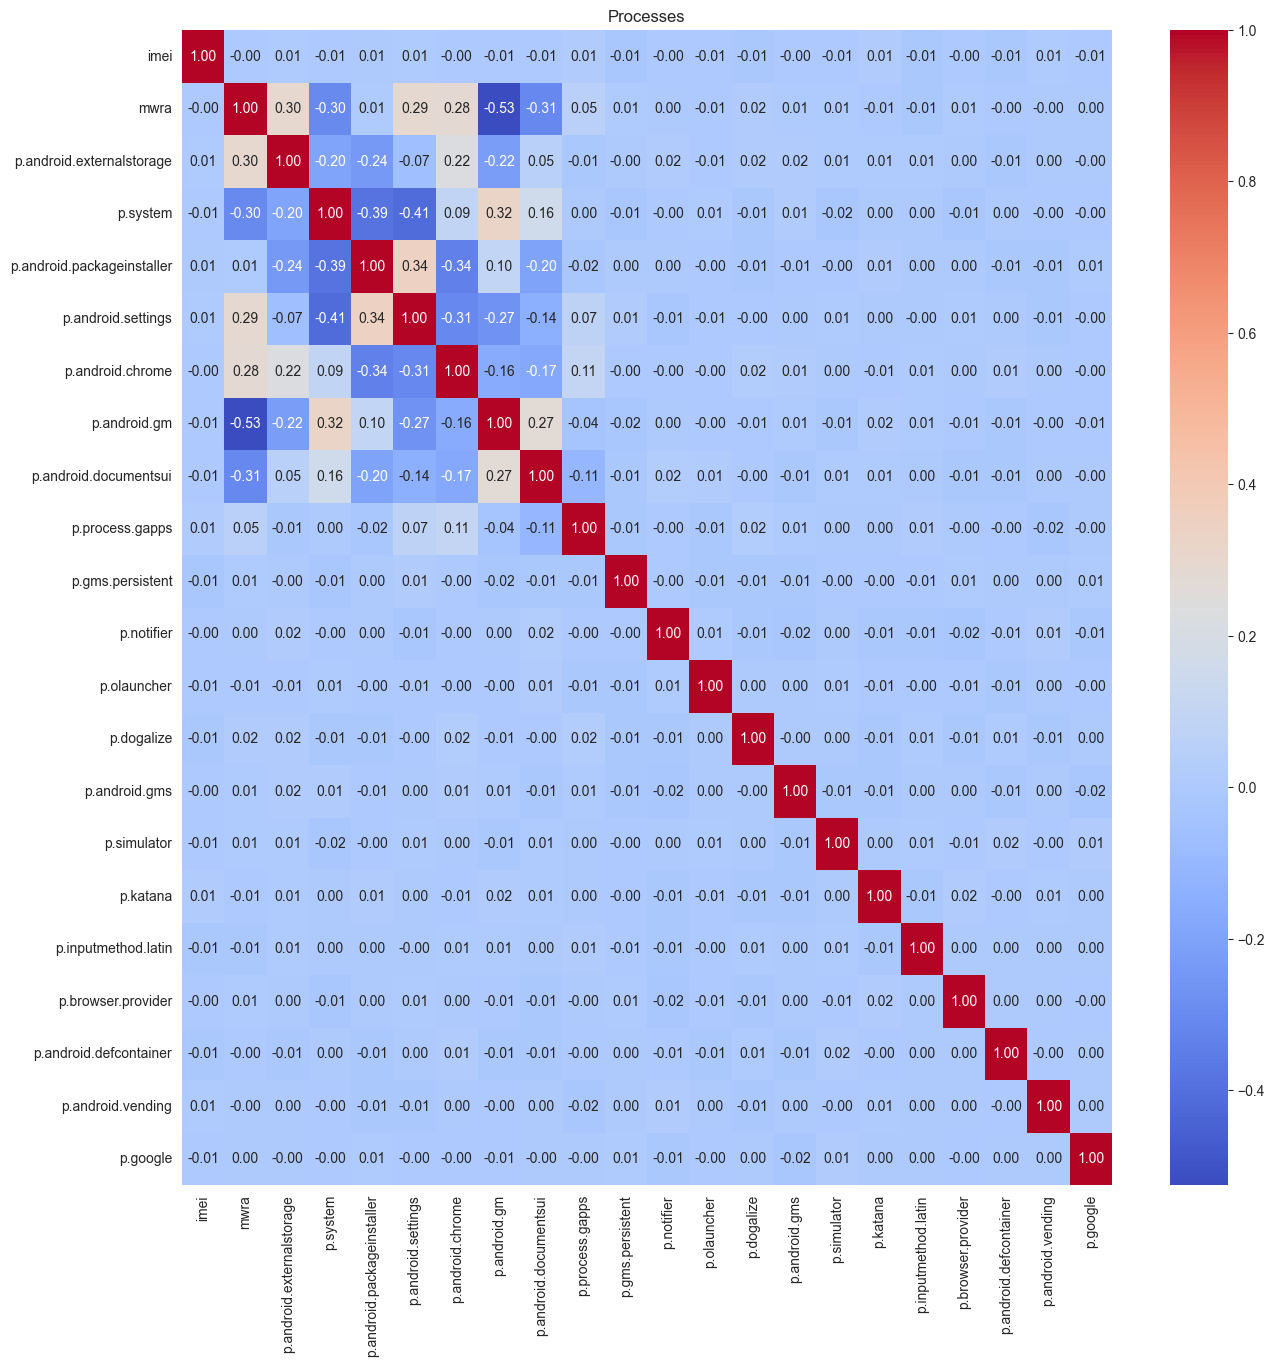

In [164]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_processes, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Processes")
plt.show()

#### z tychto vyberieme (na zaklade korelacie s mwra):
- #### p.android.gm
- #### p.android.documentsui
- #### p.system

- #### p.android.externalstorage
- #### p.android.settings
- #### p.android.chrome

# note: (pozriet si aj tie co koreluju medzi sebou (nie len s mwra), lebo su SUS xd)
# + idk ale mozno aj vymazat tie stlpce, kt. vobec nekoreluju bo nam su na koko*(s)

In [165]:
significant_processes = [
    "p.android.gm", 
    "p.android.documentsui",
    "p.system",
    "p.android.externalstorage",
    "p.android.settings",
    "p.android.chrome"]

descriptive_stats = df_processes[significant_processes].describe()
descriptive_stats

,p.android.gm,p.android.documentsui,p.system,p.android.externalstorage,p.android.settings,p.android.chrome
count,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000,14877.000000
mean,9.980249,9.389030,11.152045,11.725774,9.900600,9.901451
std,2.751125,2.363173,2.313573,2.380257,2.468733,2.575151
min,0.000000,1.613180,3.050450,3.463510,2.010490,0.879270
25%,8.056200,7.784530,9.430070,10.119220,8.081700,8.040310
50%,9.873050,9.211950,11.330840,11.835080,9.820560,9.921090
75%,11.894730,10.727000,12.883710,13.378380,11.787350,11.826740
max,20.563610,20.220660,19.385580,20.060160,18.162090,17.996590


#### pomocou histogramov, zistime normalitu tychto atributov, vieme urcit aj odlahle hodnoty, ale na to pouzijeme boxploty

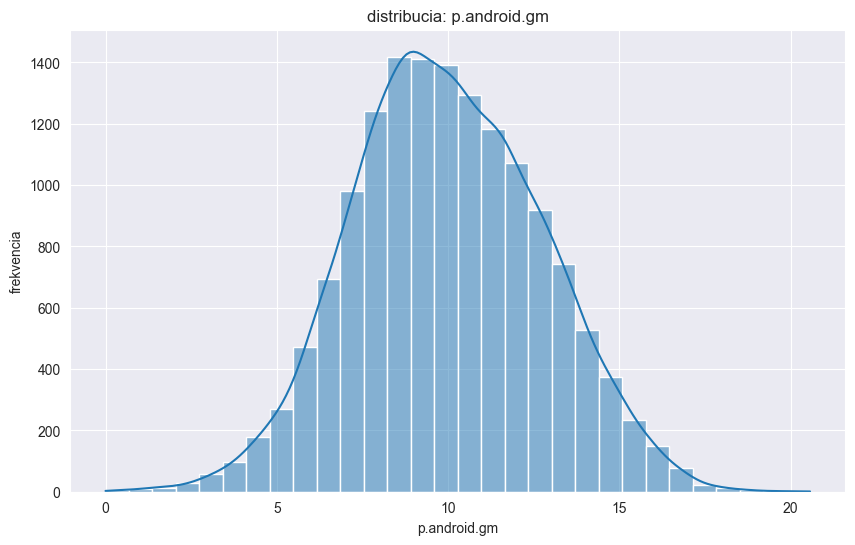

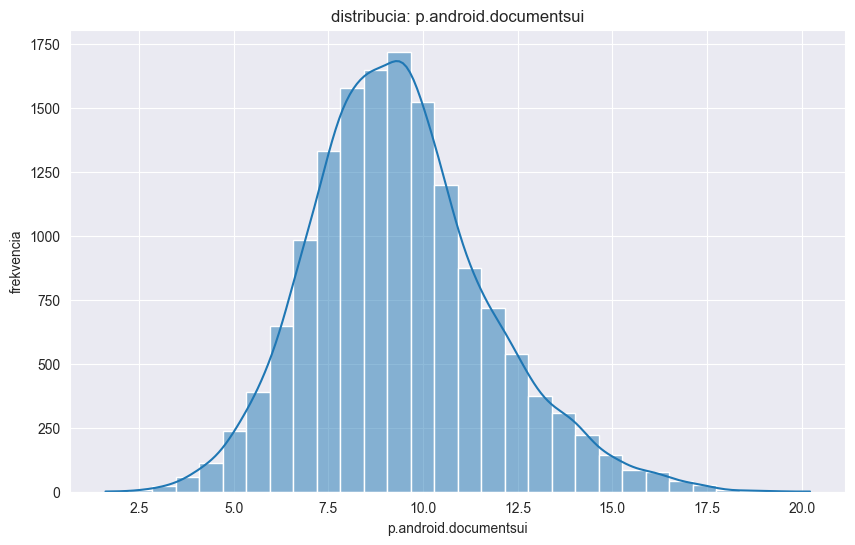

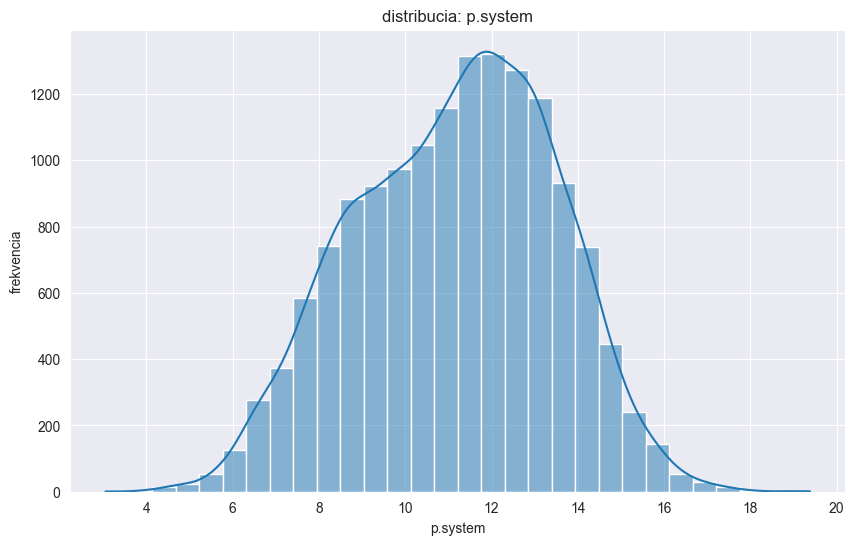

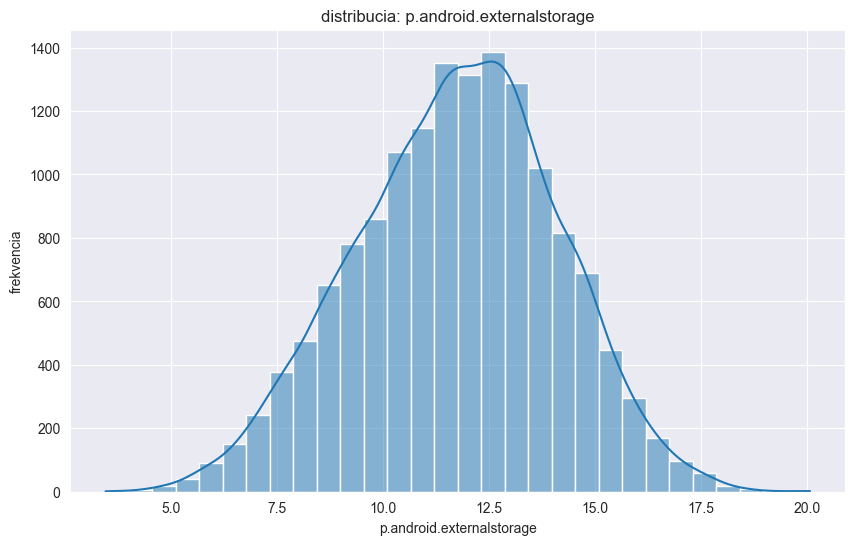

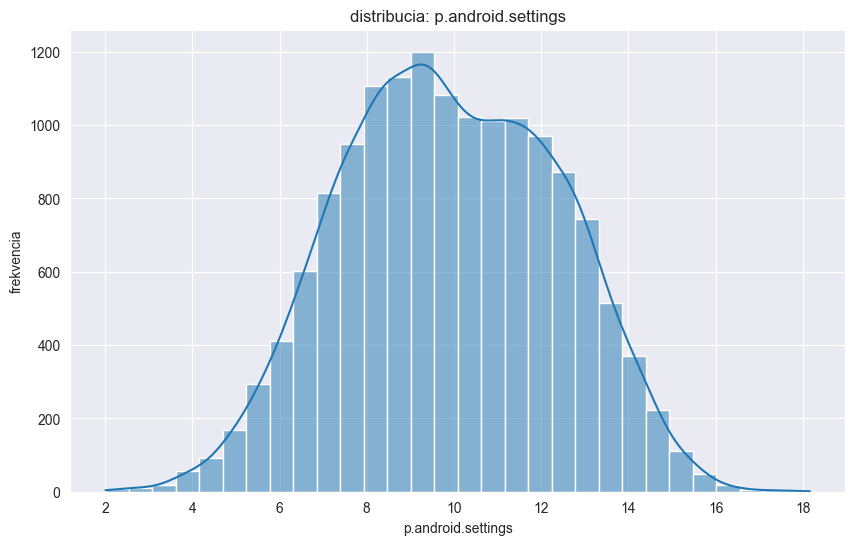

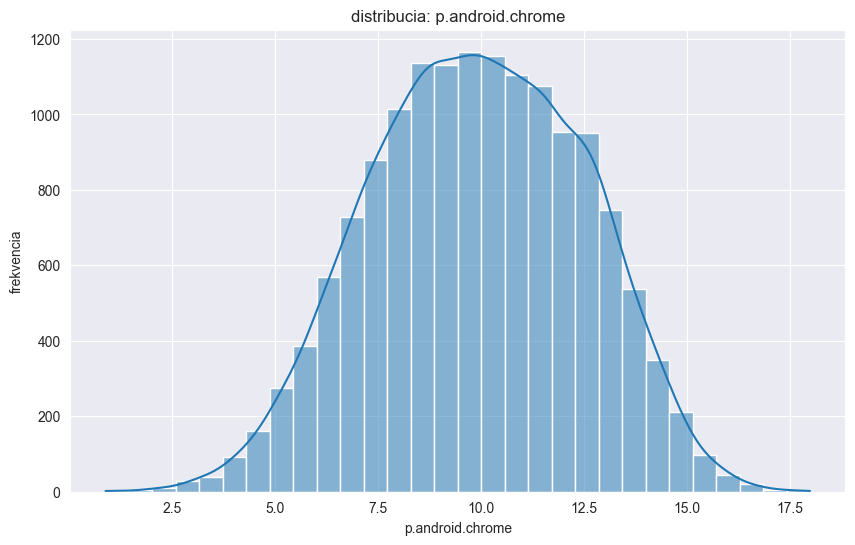

In [166]:
for attribute in significant_processes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_processes[attribute], bins=30, kde=True)
    plt.title(f'distribucia: {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('frekvencia')
    plt.show()

#### pouzijeme boxploty na identifikaciu odlahlich hodnot, ptm pojdu dorici

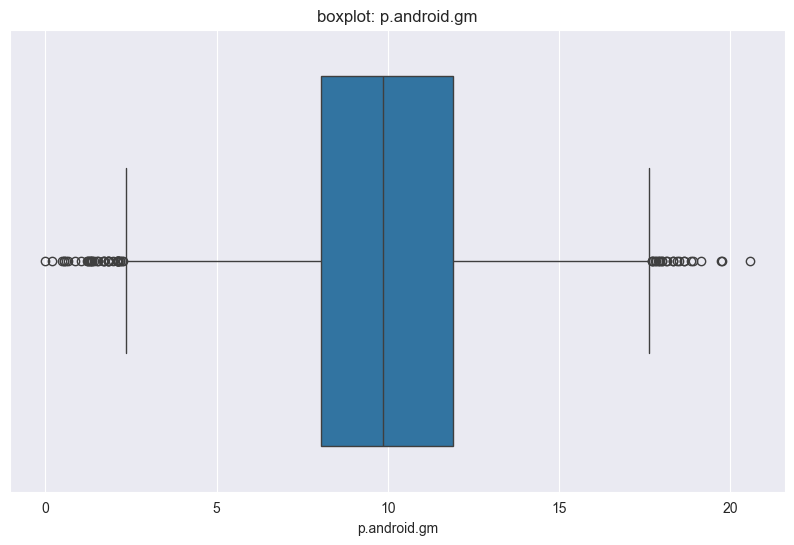

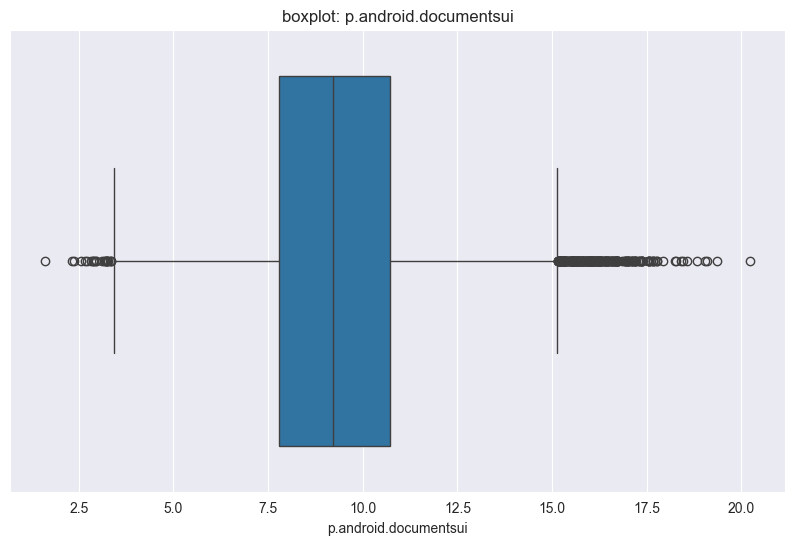

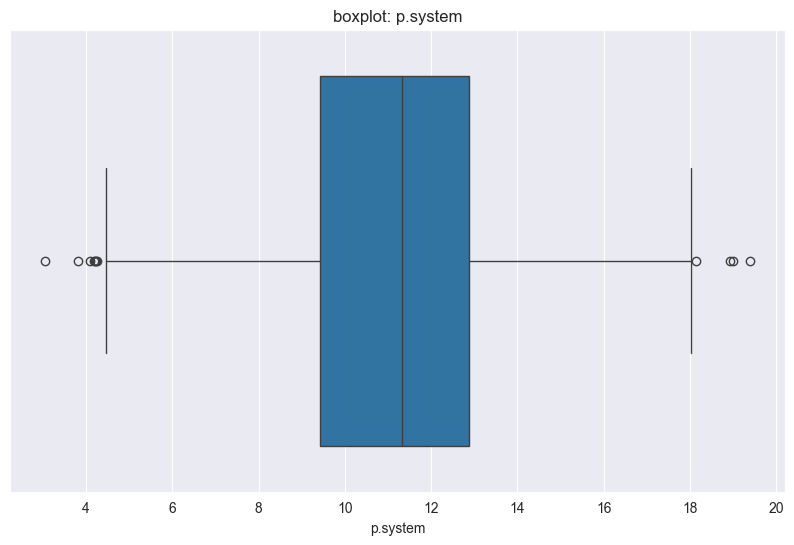

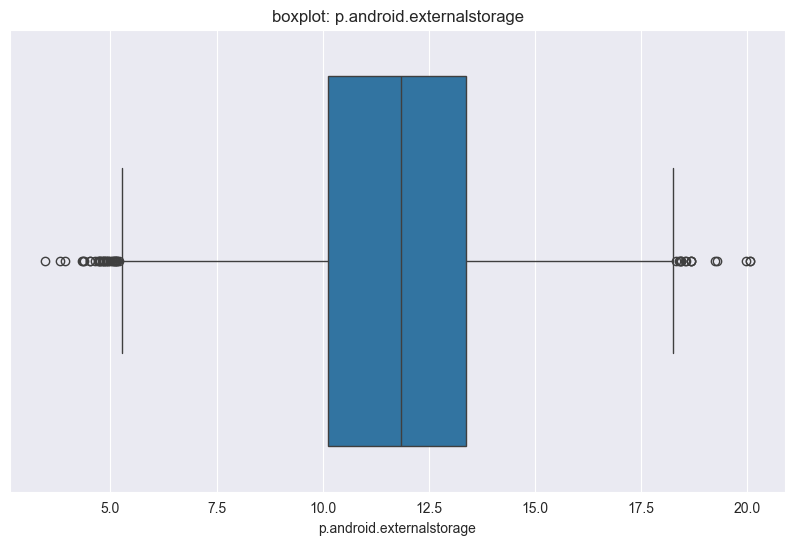

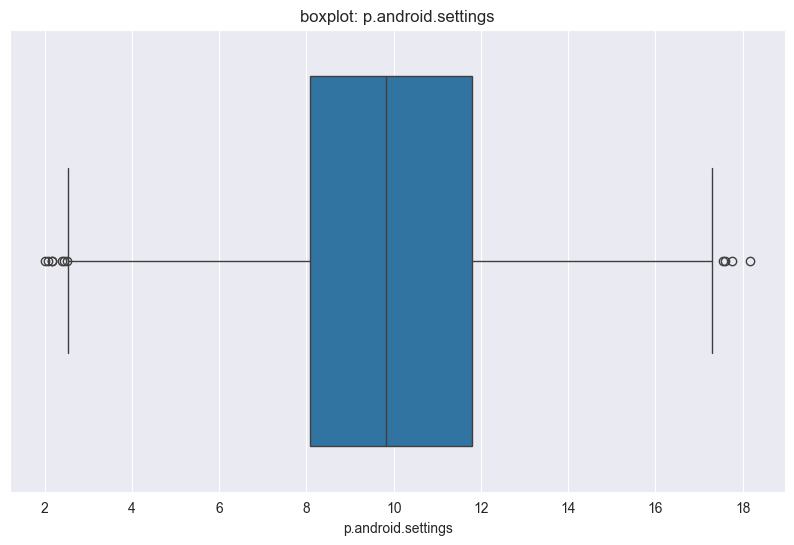

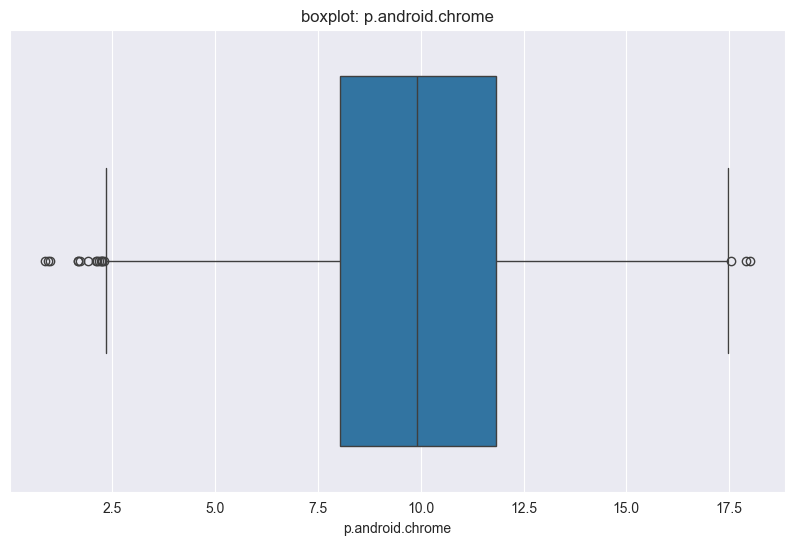

In [167]:
for attribute in significant_processes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_processes[attribute])
    plt.title(f'boxplot: {attribute}')
    plt.xlabel(attribute)
    plt.show()

## ----------------------------------------------------------------------------------------

### DF_CONNECTIONS

In [168]:
df_numerical_connections = df_connections.select_dtypes(include=['float64', 'int64'])

correlation_matrix_connections = df_numerical_connections.corr()
correlation_matrix_connections

,imei,mwra,c.android.chrome,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.UCMobile.intl,c.UCMobile.x86,c.raider,c.updateassist,c.android.vending
imei,1.000000,-0.001523,0.003797,-0.014777,-0.001987,-0.012659,-0.001449,-0.013259,-0.004180,-0.021396,0.007657,-0.013684
mwra,-0.001523,1.000000,0.533363,-0.001660,-0.268694,0.001307,-0.558028,-0.006466,-0.002549,-0.010339,-0.001297,-0.000278
c.android.chrome,0.003797,0.533363,1.000000,-0.205890,-0.351816,-0.196196,-0.565883,-0.005772,-0.002746,-0.015225,-0.006860,-0.002152
c.android.youtube,-0.014777,-0.001660,-0.205890,1.000000,0.111420,0.167930,0.300725,0.002026,0.001600,-0.010241,0.006931,0.004358
c.dogalize,-0.001987,-0.268694,-0.351816,0.111420,1.000000,0.344952,0.308418,0.000254,0.009611,0.010524,0.007342,0.013883
c.android.gm,-0.012659,0.001307,-0.196196,0.167930,0.344952,1.000000,0.091122,0.007695,-0.001156,-0.000214,0.001443,0.005808
c.katana,-0.001449,-0.558028,-0.565883,0.300725,0.308418,0.091122,1.000000,0.007668,-0.007004,0.005031,0.002022,0.001318
c.UCMobile.intl,-0.013259,-0.006466,-0.005772,0.002026,0.000254,0.007695,0.007668,1.000000,-0.004096,-0.012203,0.001995,0.001834
c.UCMobile.x86,-0.004180,-0.002549,-0.002746,0.001600,0.009611,-0.001156,-0.007004,-0.004096,1.000000,-0.001330,-0.005548,0.000735
c.raider,-0.021396,-0.010339,-0.015225,-0.010241,0.010524,-0.000214,0.005031,-0.012203,-0.001330,1.000000,-0.004085,-0.000598


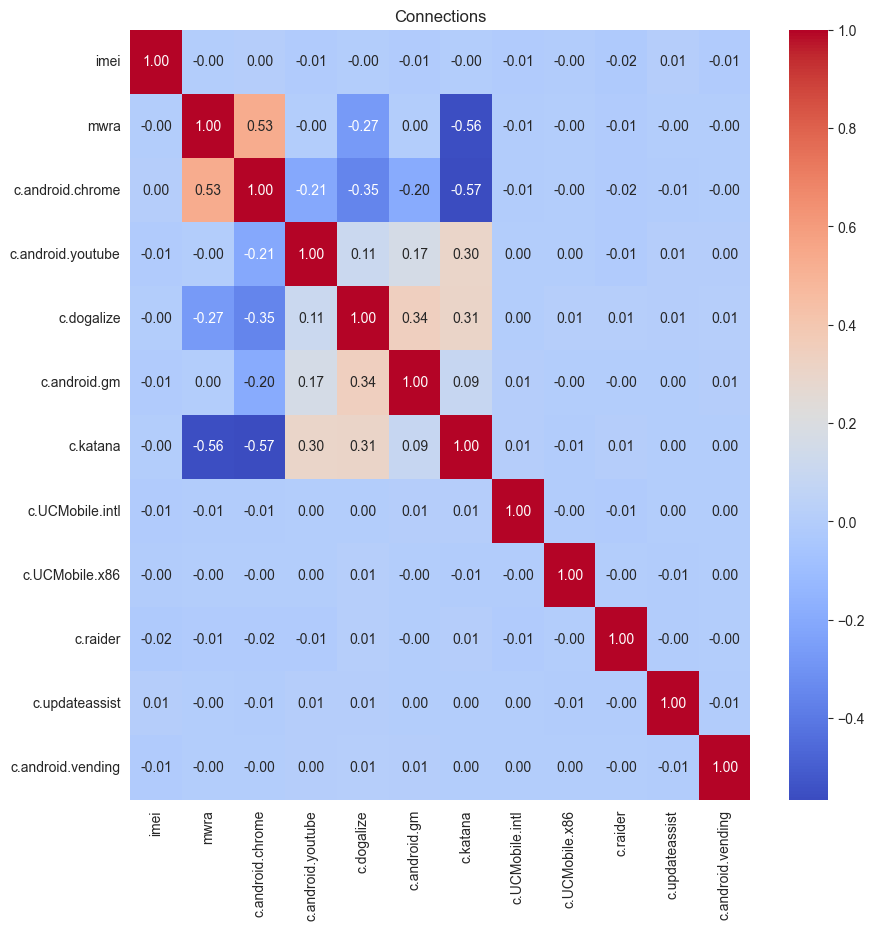

In [169]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_connections, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Connections")
plt.show()

#### z tychto vyberieme (na zaklade korelacie s mwra):
- #### c.katana
- #### c.dogalize

- #### c.android.chrome

# note: (pozriet si aj tie co koreluju medzi sebou (nie len s mwra), lebo su SUS xd, napr katana s chromom atd ...)

In [170]:
significant_connections = [
    "c.katana",
    "c.dogalize",
    "c.android.chrome"
]

descriptive_stats = df_connections[significant_connections].describe()
descriptive_stats

,c.katana,c.dogalize,c.android.chrome
count,14877.000000,14877.000000,14877.000000
mean,10.007788,11.168276,11.029799
std,2.573152,2.659182,2.714585
min,1.384790,1.448360,1.264880
25%,8.137400,9.299940,9.132130
50%,9.847920,11.267770,11.094830
75%,11.821740,13.056600,12.968940
max,20.036020,21.522060,20.710650


#### pomocou histogramov, zistime normalitu tychto atributov, vieme urcit aj odlahle hodnoty, ale na to pouzijeme boxploty

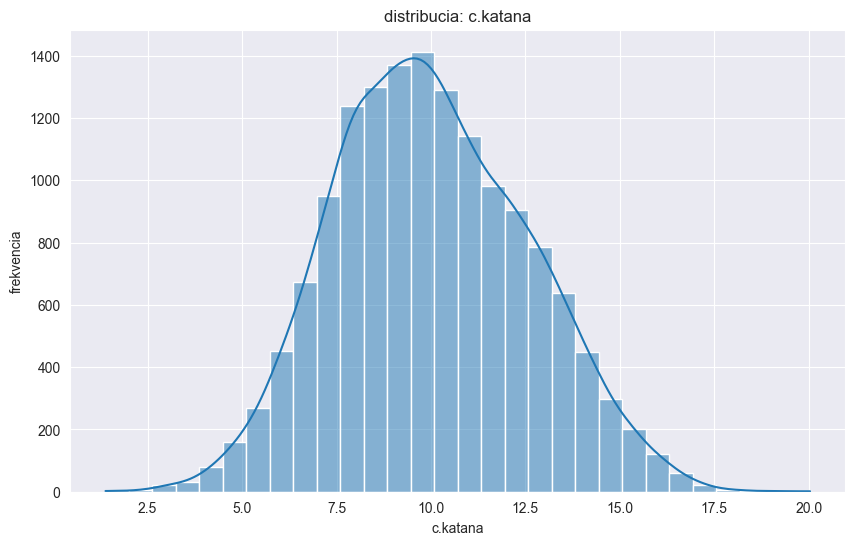

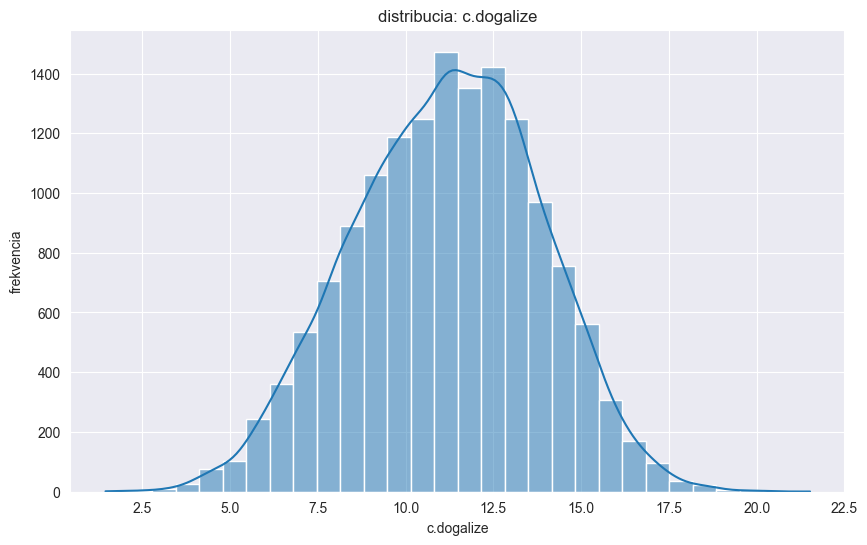

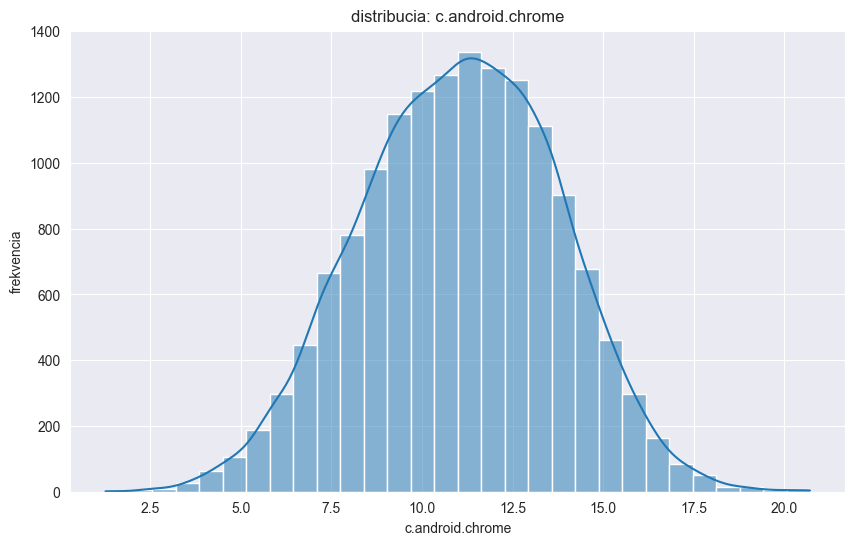

In [171]:
for attribute in significant_connections:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_connections[attribute], bins=30, kde=True)
    plt.title(f'distribucia: {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('frekvencia')
    plt.show()

#### pomocou boxplotov analyzujeme odlahle hodnoty, ktore neskor mozeme poslat do faka (asi)

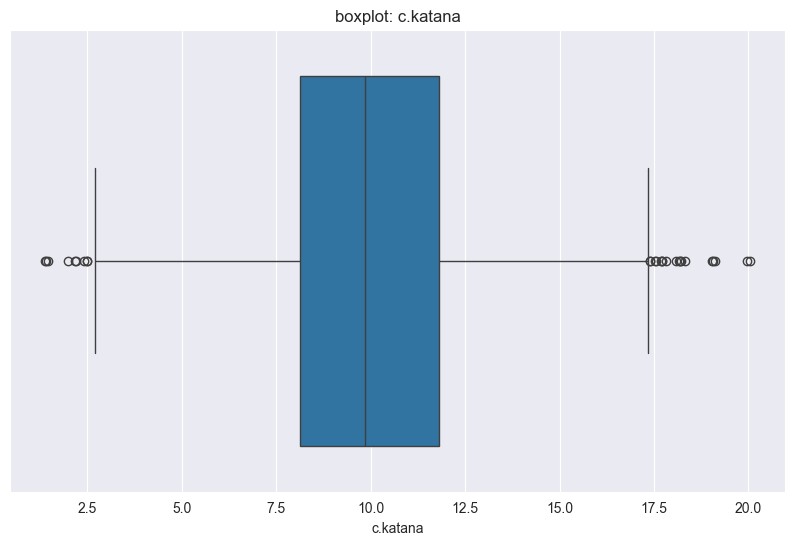

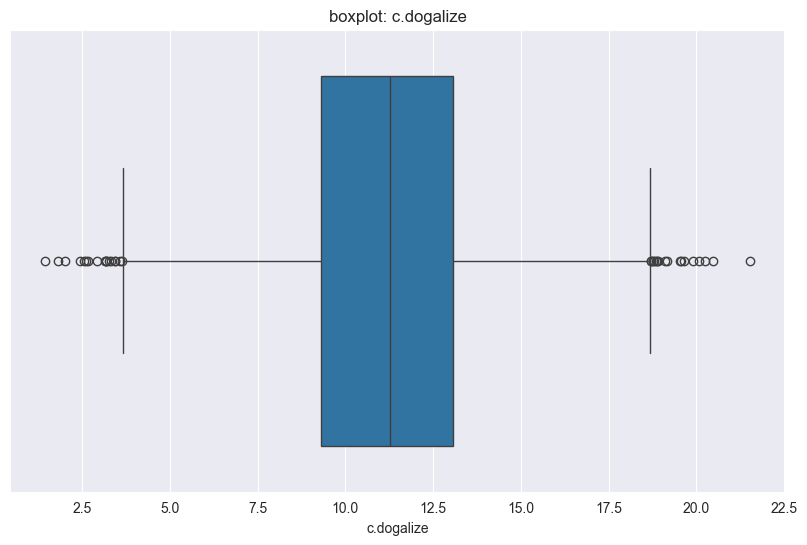

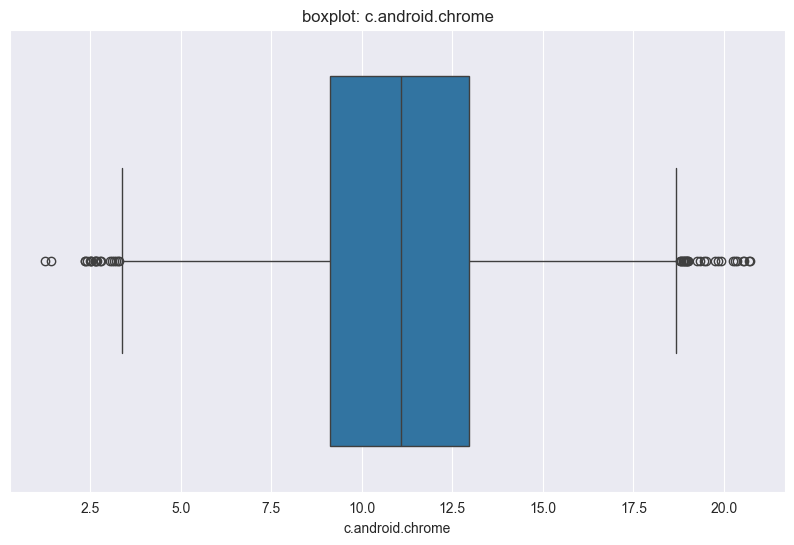

In [172]:
for attribute in significant_connections:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_connections[attribute])
    plt.title(f'boxplot: {attribute}')
    plt.xlabel(attribute)
    plt.show()

# NOTE: uplne na random som si vsimol , ze vblastne , ked si pozries f.ex. connections: mas tam pre jedno imei viacero riadkov a pri nich aj casy, z toho vypliva, ze tie casy urcuju intervaly (random intervaly) a pravdepodobne aj nejaku postupnoost, ktora urcuje poradie tych procesov ako katana, ... google atd, resp. vyuzivanie CPU , idk kt. z tychto dvoch to treba mozno v buducnosti vydumat, idk ci ani tomu sam chapem co tupisem je 12 hodin skoro xd

## ----------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------

## C - Párová analýza dát
#### idk , ci tomu chapem , ale napadlo ma , zeby sme spojili vsetky vyvolene atributy do jedneho dataframu a podla toho spravili korelacnu maticu (nechce sa mi ich spajat , pretoze fr neviem ako na to xd), idk vytvoril som aj novy .csv subor , len tak zo srandy xd

In [173]:
df_merged = pd.merge(df_connections, df_processes, on=['imei', 'ts'], how='inner')
df_merged = df_merged[significant_processes + significant_connections]
df_merged.to_csv('data/merged_data.csv', index=False)
df_merged.head()

,p.android.gm,p.android.documentsui,p.system,p.android.externalstorage,p.android.settings,p.android.chrome,c.katana,c.dogalize,c.android.chrome
0,14.50294,12.49939,13.93596,12.71345,8.63678,7.59294,12.05903,14.28416,9.60395
1,9.23023,10.96660,13.66329,14.00354,8.45907,11.54816,9.31984,15.47703,10.90381
2,11.32397,8.95241,12.02995,9.12135,5.03619,9.25225,16.41358,11.48817,7.96027
3,12.54341,6.13562,10.88392,10.02552,4.58649,7.65930,14.09485,11.68449,7.96574
4,9.55446,7.87986,10.99286,10.18964,10.09407,13.85506,6.18137,10.16739,12.77276


#### a vsetky atributy porovname v heatmape, repr. korelacie medzi vsetkymi atributmi

In [174]:
df_numerical_merged = df_merged.select_dtypes(include=['float64', 'int64'])

correlation_matrix_connections = df_numerical_merged.corr()
correlation_matrix_connections

,p.android.gm,p.android.documentsui,p.system,p.android.externalstorage,p.android.settings,p.android.chrome,c.katana,c.dogalize,c.android.chrome
p.android.gm,1.000000,0.270123,0.323106,-0.222442,-0.274216,-0.163102,0.327278,0.073353,-0.381835
p.android.documentsui,0.270123,1.000000,0.164769,0.047779,-0.138505,-0.173978,0.298284,0.120572,-0.432416
p.system,0.323106,0.164769,1.000000,-0.195124,-0.413111,0.093559,0.187586,0.562171,-0.182522
p.android.externalstorage,-0.222442,0.047779,-0.195124,1.000000,-0.065420,0.224111,-0.224033,-0.050950,0.119526
p.android.settings,-0.274216,-0.138505,-0.413111,-0.065420,1.000000,-0.309468,-0.321671,-0.531855,0.356011
p.android.chrome,-0.163102,-0.173978,0.093559,0.224111,-0.309468,1.000000,-0.332473,0.119961,0.452749
c.katana,0.327278,0.298284,0.187586,-0.224033,-0.321671,-0.332473,1.000000,0.308418,-0.565883
c.dogalize,0.073353,0.120572,0.562171,-0.050950,-0.531855,0.119961,0.308418,1.000000,-0.351816
c.android.chrome,-0.381835,-0.432416,-0.182522,0.119526,0.356011,0.452749,-0.565883,-0.351816,1.000000


<Axes: >

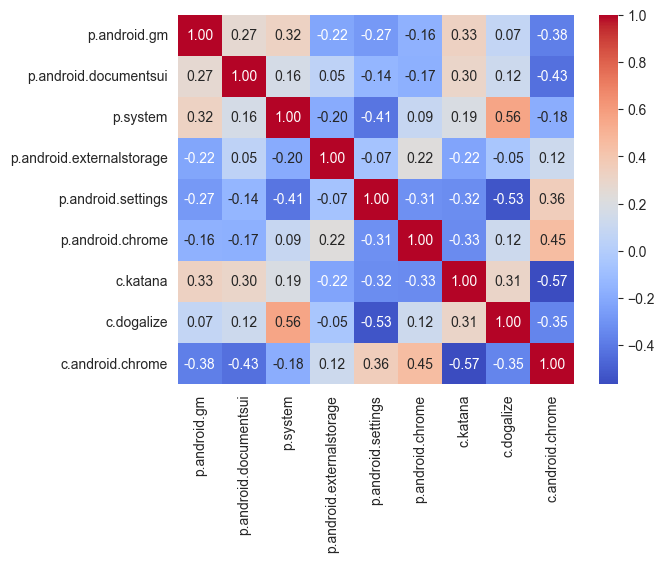

In [175]:
sns.heatmap(correlation_matrix_connections, annot=True, cmap="coolwarm", fmt='.2f')

#### porovnavame podobne atributy, za predpokladu, ze sa hodnoty budu rovnat

array([[<Axes: title={'center': 'c.android.vending'}>,
        <Axes: title={'center': 'p.android.vending'}>]], dtype=object)

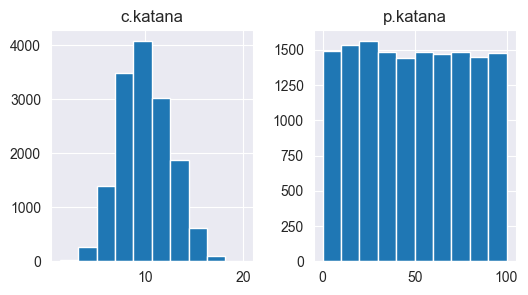

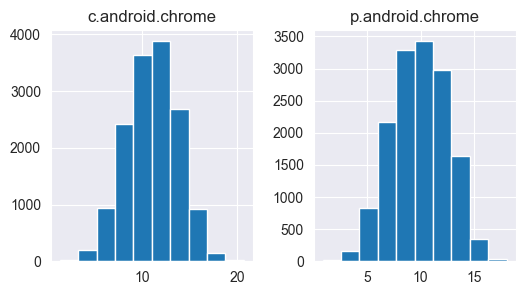

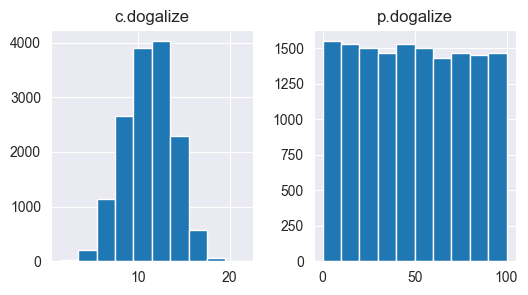

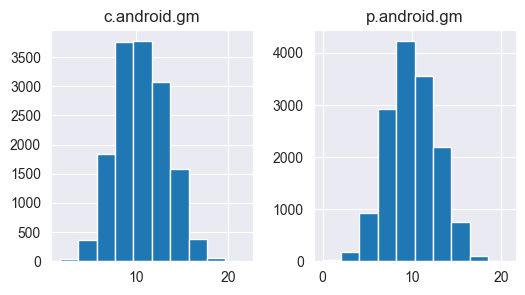

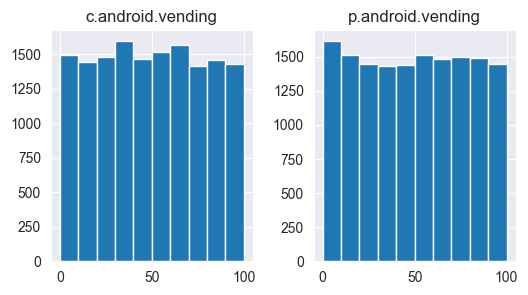

In [176]:
pd.DataFrame({'c.katana': df_connections['c.katana'], 'p.katana': df_processes['p.katana']}).hist(figsize=(6,3))
pd.DataFrame({'c.android.chrome': df_connections['c.android.chrome'], 'p.android.chrome': df_processes['p.android.chrome']}).hist(figsize=(6,3))
pd.DataFrame({'c.dogalize': df_connections['c.dogalize'], 'p.dogalize': df_processes['p.dogalize']}).hist(figsize=(6,3))
pd.DataFrame({'c.android.gm': df_connections['c.android.gm'], 'p.android.gm': df_processes['p.android.gm']}).hist(figsize=(6,3))
pd.DataFrame({'c.android.vending': df_connections['c.android.vending'], 'p.android.vending': df_processes['p.android.vending']}).hist(figsize=(6,3))

#### porovnatelne su chrome, gm a aj vending (cca xd)

## D - závislosti medzi predikovanou premennou a ostatnými premennými (sme identifikovali hore)
[heatmap](#df_processes) btw nejde ten link , ale snazil som sa xd

## E - naše prvotné zamyslenie k riešeniu zadania:
- myslime si, ze viacero atributov su medzi sebou prepojene a zavisle, ako napr. katana/chrome/ , atd
- zavisi od viacerych atributov, spojili sme ich do df_merged
- urcite bude treba kombinovat zaznamy z viacerych suborov, uz sme tak aj vykonali, no musime viac presetrit zavislosti medzi roznymi atributmy a tak ich nejako zoskupovat a nasledne riesit dalsie problemy

# 1.2 Identifikácia problémov, integrácia a čistenie dát
## A - prvotne riesenia problemov

#### mazeme duplikaty

In [183]:
print(df_connections.duplicated().sum())
print(df_devices.duplicated().sum())
print(df_processes.duplicated().sum())
print(df_profiles.duplicated().sum())

print(df_merged.duplicated().sum())

0
0
0
0
0


In [182]:
df_connections  = df_connections.drop_duplicates()
df_devices      = df_devices.drop_duplicates()
df_processes    = df_processes.drop_duplicates()
df_profiles     = df_profiles.drop_duplicates()

df_merged       = df_merged.drop_duplicates()